slope = 1.15 ± 0.17
y-intercept = -1.10 ± 0.41


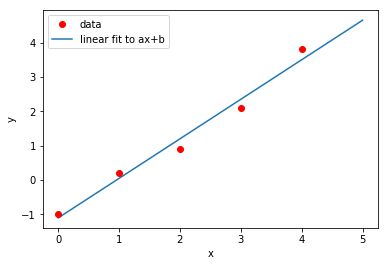

In [1]:
# LINEAR REGRESSION IN PYTHON
# Dr. I. Llorente-Garcia, UCL Dept. of Physics and Astronomy.
#
# Import libraries needed:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The (x,y) data to fit:
x = np.array([0, 1, 2, 3, 4])
y = np.array([-1, 0.2, 0.9, 2.1, 3.8])
# Vertical error bars (y error bars):
errory = np.array([0.2, 0.3, 0.4, 0.3, 0.45])

# A. Perform a linear fit without weighting:
# Fit to a line ax+b.
# We will obtain the uncertainties of slope and intercept from the covariance matrix.
# Degree of polynomial we want to fit, use 1 for a line:
degree = 1 
fit, cvm = np.polyfit(x,y,degree,cov='unscaled') # fit function.
# Note regarding cov: If given and not False, return not just the estimate but also 
# its covariance matrix. By default, the covariance are scaled by chi2/sqrt(N-dof), i.e., 
# the weights are presumed to be unreliable except in a relative sense and everything is 
# scaled such that the reduced chi2 is unity. This scaling is omitted if cov='unscaled', 
# as is relevant for the case that the weights are 1/sigma**2, with sigma known to be a 
# reliable estimate of the uncertainty.
# 
# (see https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html).
# Outputs of np.polyfit are fit parameters (fit) and covariance matrix (cvm)
# The slope is the first element of fit: a = fit[0].
# The intercept is the second element of fit: b = fit[1].
# To obtain the uncertainties of fit parameters we get the diagonal elements
# of the covariance matrix:
dfit = [np.sqrt(cvm[i,i]) for i in range(2)] 
# The error of the slope is dfit[0].
# The error of the intercept is dfit[1].
# Print fit parameters with their errors (to 2 decimal places):
print(u"slope = {0:0.2f} \xb1 {1:0.2f}".format(fit[0], dfit[0]))
print(u"y-intercept = {0:0.2f} \xb1 {1:0.2f}".format(fit[1], dfit[1]))

# Plot the data points together with the linear fit:
xline = np.array([0, 5]) #create array to plot fitted line
yline = fit[0]*xline + fit[1] #calculate fitted line for every xfit point
plt.plot(x, y, 'ro', label="data")
plt.plot(xline, yline, zorder=-1, label="linear fit to ax+b")
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

slope = 1.10 ± 0.13
y-intercept = -1.02 ± 0.25


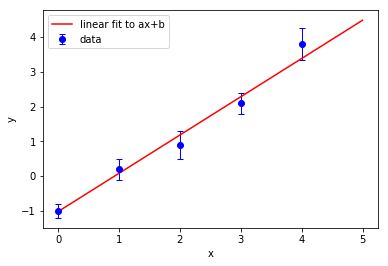

In [2]:
# B. Perform a weighted linear fit to a line ax+b:

# First calculate the weights for the y coordinate. 
# Enter weights as an array of 1/sigma for Gaussian uncertainties (not 1/sigma**2):
yWeights = 1/errory
# Perform weighted fit:
fit, cvm = np.polyfit(x,y,degree,w=yWeights,cov='unscaled')
# Outputs and errors of fitted parameters are same as before.
dfit = [np.sqrt(cvm[i,i]) for i in range(2)]
# Print fit parameters with their errors (to 2 decimal places):
print(u"slope = {0:0.2f} \xb1 {1:0.2f}".format(fit[0], dfit[0]))
print(u"y-intercept = {0:0.2f} \xb1 {1:0.2f}".format(fit[1], dfit[1]))

# Plot the data points together with the linear fit:
xline = np.array([0, 5]) #create array to plot fitted line
yline = fit[0]*xline + fit[1] #calculate fitted line for every xfit point
# Plot points with error bars:
plt.errorbar(x, y, yerr = errory, fmt="bo", linewidth=1, capsize=3, label="data")
#plt.plot(x, y, 'ro', label="data")
plt.plot(xline, yline,'r', label="linear fit to ax+b")
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.show()